In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


## Logistic Regression predicting smoker

In [ ]:
df = pd.read_csv("insurance_dataset.csv")

X = df.drop(['smoker'], axis=1)  
X = pd.get_dummies(X, drop_first=True)  
y = (df['smoker'] == 'yes').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

c:\Users\ikorn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.87      0.85      0.86    149879
           1       0.85      0.88      0.87    150121

    accuracy                           0.86    300000
   macro avg       0.86      0.86      0.86    300000
weighted avg       0.86      0.86      0.86    300000

[[127322  22557]
 [ 18212 131909]]


## Logistic regression predicting gender

In [ ]:
df = pd.read_csv("insurance_dataset.csv")
X = df.drop(['gender'], axis=1) 
X = pd.get_dummies(X, drop_first=True)  
y = (df['gender'] == 'male').astype(int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

c:\Users\ikorn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66    150093
           1       0.66      0.68      0.67    149907

    accuracy                           0.67    300000
   macro avg       0.67      0.67      0.67    300000
weighted avg       0.67      0.67      0.67    300000

Confusion Matrix:
[[ 97880  52213]
 [ 47633 102274]]


In [6]:
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print("Feature Importance for Gender Prediction:")
print(feature_importance)

Feature Importance for Gender Prediction:
exercise_frequency_Never                      1.759657
exercise_frequency_Rarely                     1.331285
occupation_Unemployed                         1.162775
exercise_frequency_Occasionally               0.957810
occupation_Student                            0.709658
region_southwest                              0.551193
region_northwest                              0.547709
region_southeast                              0.422176
charges                                       0.000785
age                                          -0.026082
bmi                                          -0.058120
medical_history_High blood pressure          -0.071306
family_medical_history_High blood pressure   -0.094621
children                                     -0.187295
occupation_White collar                      -0.367643
coverage_level_Standard                      -1.902805
family_medical_history_Heart disease         -3.143513
medical_history_Heart d

While the model provides a reasonable accuracy of 67%, it has significant misclassification issues.
Behavioral attributes (e.g., exercise frequency) and socio-economic factors (e.g., occupation, coverage level) are stronger predictors of gender than physical attributes (e.g., BMI, age).

## PCA

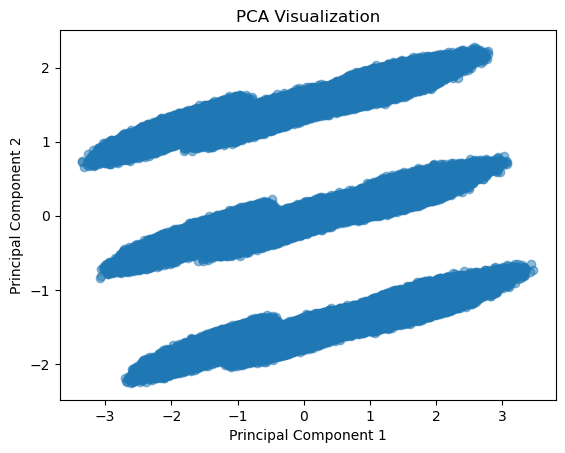

In [ ]:
X = pd.get_dummies(df.drop('charges', axis=1), drop_first=True)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_X)

plt.scatter(components[:, 0], components[:, 1], alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The PCA visualization shows that the data has been reduced to two principal components. The linear separations between rows suggest that the dataset contains structured patterns, possibly due to correlations between features

In [13]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Component Loadings:")
print(pd.DataFrame(pca.components_, columns=X.columns))

Explained Variance Ratio: [0.08588198 0.07090934]
Principal Component Loadings:
        age       bmi  children   Cluster  gender_male  smoker_yes  \
0  0.355848  0.536428  0.013856  0.691395     0.022710    0.128893   
1  0.061297  0.146823  0.028944  0.104042     0.010079    0.034497   

   region_northwest  region_southeast  region_southwest  \
0         -0.008933          0.005949         -0.004334   
1          0.011299         -0.007545         -0.006196   

   medical_history_Heart disease  ...  family_medical_history_Heart disease  \
0                       0.122770  ...                              0.119525   
1                       0.054065  ...                              0.036999   

   family_medical_history_High blood pressure  exercise_frequency_Never  \
0                                   -0.078766                 -0.030278   
1                                   -0.028325                 -0.016535   

   exercise_frequency_Occasionally  exercise_frequency_Rarely  \
0 

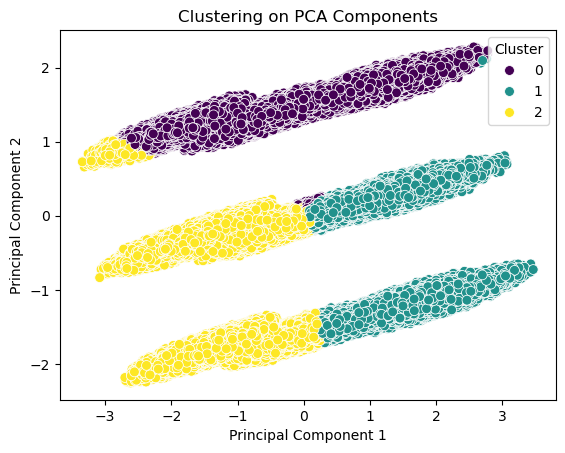

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=2)
clusters = kmeans.fit_predict(components)

df['Cluster_PCA'] = clusters

sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=clusters, palette='viridis', s=50)
plt.title("Clustering on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

The clusters are well-separated along the PCA axes, indicating that the dimensionality reduction effectively captured key patterns in the data.
Cluster 2: Largest cluster (343,927 individuals).
Cluster 0: Moderate size (329,328 individuals).
Cluster 1: Smallest cluster (326,745 individuals).

In [17]:
cluster_sizes = df['Cluster_PCA'].value_counts()
print(cluster_sizes)

Cluster_PCA
2    343927
0    329328
1    326745
Name: count, dtype: int64


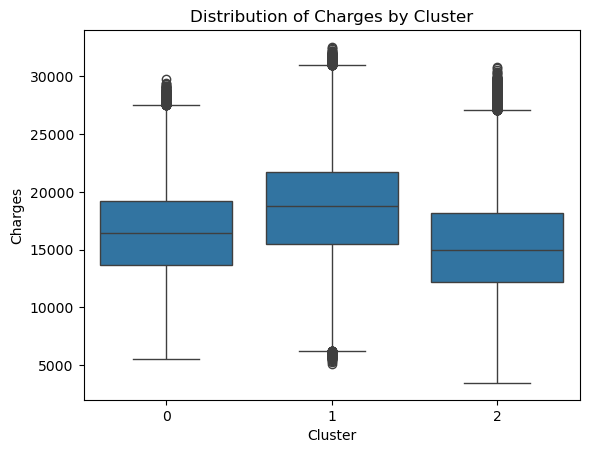

In [18]:
sns.boxplot(data=df, x='Cluster_PCA', y='charges')
plt.title("Distribution of Charges by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Charges")
plt.show()

Cluster 1 likely represents high-risk individuals with factors driving higher insurance charges.
Cluster 0 and Cluster 2 may represent lower- and moderate-risk groups, respectively.

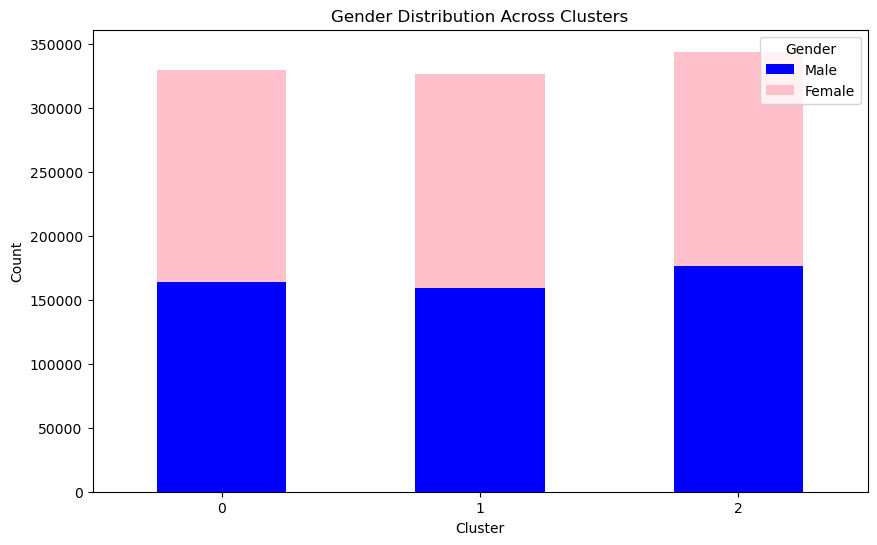

In [ ]:
gender_cluster_counts = df.groupby(['Cluster_PCA', 'gender']).size().unstack()

gender_cluster_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'pink'])
plt.title("Gender Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.xticks(rotation=0)
plt.show()

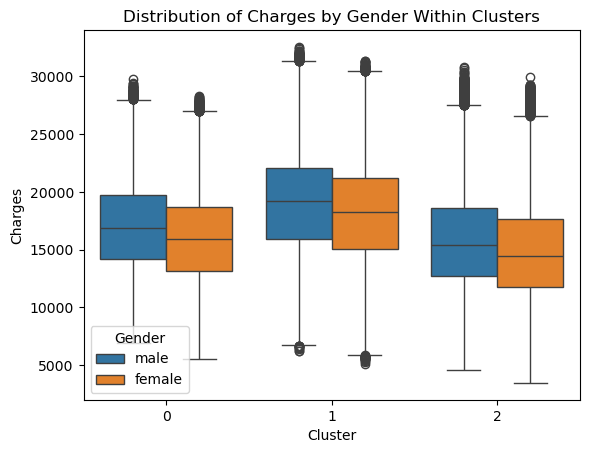

In [21]:
sns.boxplot(data=df, x='Cluster_PCA', y='charges', hue='gender')
plt.title("Distribution of Charges by Gender Within Clusters")
plt.xlabel("Cluster")
plt.ylabel("Charges")
plt.legend(title="Gender")
plt.show()